<a href="https://colab.research.google.com/github/SauleAbenova/examen/blob/main/Home%20work%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Misol uchun yig'ilgan ma'lumot
data = {
    'product_name': ['Product 1', 'Product 2', 'Product 3'],
    'rating': [4.5, 4.2, 3.8],
    'review': ['Great product!', 'Not bad, but could be better.', 'Very disappointing.']
}

df = pd.DataFrame(data)
print(df)


  product_name  rating                         review
0    Product 1     4.5                 Great product!
1    Product 2     4.2  Not bad, but could be better.
2    Product 3     3.8            Very disappointing.


In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline('sentiment-analysis')

# Har bir sharhni tahlil qilish
df['sentiment'] = df['review'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
print(df)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


  product_name  rating                         review sentiment
0    Product 1     4.5                 Great product!  POSITIVE
1    Product 2     4.2  Not bad, but could be better.  NEGATIVE
2    Product 3     3.8            Very disappointing.  NEGATIVE


In [ ]:
# Eng ko'p sharh yozilgan 3 mahsulotni topish
top_reviews = df.groupby('product_name').size().sort_values(ascending=False).head(3)
print(top_reviews)


product_name
Product 1    1
Product 2    1
Product 3    1
dtype: int64


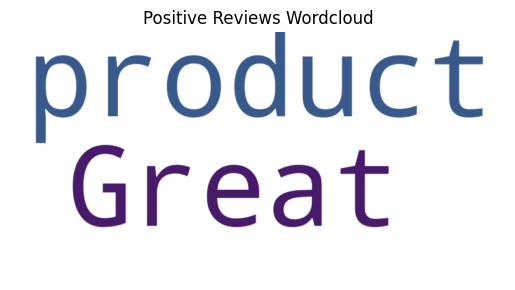

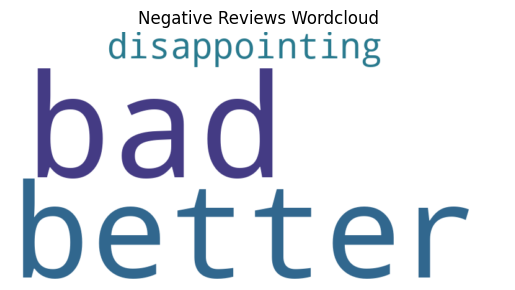

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pozitiv va negativ kalit so'zlar
positive_keywords = ['good', 'great', 'excellent']
negative_keywords = ['bad', 'disappointing', 'poor']

# Pozitiv va negativ so'zlarni ajratish
positive_reviews = df[df['sentiment'] == 'POSITIVE']
negative_reviews = df[df['sentiment'] == 'NEGATIVE']

# Wordcloud yaratish
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_reviews['review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Reviews Wordcloud")
plt.axis('off')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_reviews['review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Reviews Wordcloud")
plt.axis('off')
plt.show()
